# Análisis calidad del aire.


In [50]:
#  Importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from itertools import accumulate

%matplotlib inline

In [51]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 6 #  El primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [52]:
files = ['ago_mo19.csv', 'sep_mo19.csv', 'nov_mo19.csv', 'nov_mo19.csv', 'dic_mo19.csv']

In [53]:
df_list = []
for dirname, _, filenames in os.walk('../Fase-2/CSVs'):
    for file in files:
        df_aux = pd.read_csv(os.path.join(dirname, file), sep=';', header=0)
        df_aux.head()
        df_list.append(df_aux)

df = pd.concat(df_list, ignore_index=True, sort=False)
df.head()


,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2019,8,1,7.0,V,...,8.0,V,8.0,V,7.0,V,6.0,V,6.0,V
1,28,79,4,1,28079004_1_38,2019,8,2,7.0,V,...,7.0,V,7.0,V,6.0,V,6.0,V,6.0,V
2,28,79,4,1,28079004_1_38,2019,8,3,7.0,V,...,7.0,V,7.0,V,6.0,V,6.0,V,5.0,V
3,28,79,4,1,28079004_1_38,2019,8,4,6.0,V,...,7.0,V,6.0,V,6.0,V,6.0,V,6.0,V
4,28,79,4,1,28079004_1_38,2019,8,5,6.0,V,...,8.0,V,7.0,V,7.0,V,6.0,V,6.0,V


In [54]:
df.tail()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
22955,28,79,60,14,28079060_14_6,2019,12,27,32.34,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
22956,28,79,60,14,28079060_14_6,2019,12,28,1.25,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
22957,28,79,60,14,28079060_14_6,2019,12,29,1.00,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
22958,28,79,60,14,28079060_14_6,2019,12,30,1.00,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
22959,28,79,60,14,28079060_14_6,2019,12,31,1.00,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V


In [55]:
#  Contamos los valores faltantes 
df.isna().sum()

PROVINCIA         0
MUNICIPIO         0
ESTACION          0
MAGNITUD          0
PUNTO_MUESTREO    0
ANO               0
MES               0
DIA               0
H01               0
V01               0
H02               0
V02               0
H03               0
V03               0
H04               0
V04               0
H05               0
V05               0
H06               0
V06               0
H07               0
V07               0
H08               0
V08               0
H09               0
V09               0
H10               0
V10               0
H11               0
V11               0
H12               0
V12               0
H13               0
V13               0
H14               0
V14               0
H15               0
V15               0
H16               0
V16               0
H17               0
V17               0
H18               0
V18               0
H19               0
V19               0
H20               0
V20               0
H21               0
V21               0


In [56]:
#  La informacion que nos puede ser util sobre los datos del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22960 entries, 0 to 22959
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROVINCIA       22960 non-null  int64  
 1   MUNICIPIO       22960 non-null  int64  
 2   ESTACION        22960 non-null  int64  
 3   MAGNITUD        22960 non-null  int64  
 4   PUNTO_MUESTREO  22960 non-null  object 
 5   ANO             22960 non-null  int64  
 6   MES             22960 non-null  int64  
 7   DIA             22960 non-null  int64  
 8   H01             22960 non-null  float64
 9   V01             22960 non-null  object 
 10  H02             22960 non-null  float64
 11  V02             22960 non-null  object 
 12  H03             22960 non-null  float64
 13  V03             22960 non-null  object 
 14  H04             22960 non-null  float64
 15  V04             22960 non-null  object 
 16  H05             22960 non-null  float64
 17  V05             22960 non-null 

In [57]:
#  Seleccionamos los datos de la estacion que nos interesa para el analisis, en este caso la estacion 4
df = df[df['ESTACION'] == 4]  

In [58]:
#  Filtramos los datos por NO2
df = df[(df['MAGNITUD'] == 8)]
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
93,28,79,4,8,28079004_8_8,2019,8,1,20.0,V,...,23.0,V,28.0,V,37.0,V,26.0,V,57.0,V
94,28,79,4,8,28079004_8_8,2019,8,2,68.0,V,...,24.0,V,36.0,V,73.0,V,57.0,V,91.0,V
95,28,79,4,8,28079004_8_8,2019,8,3,103.0,V,...,17.0,V,23.0,V,40.0,V,36.0,V,23.0,V
96,28,79,4,8,28079004_8_8,2019,8,4,21.0,V,...,16.0,V,25.0,V,49.0,V,38.0,V,24.0,V
97,28,79,4,8,28079004_8_8,2019,8,5,17.0,V,...,19.0,V,22.0,V,26.0,V,28.0,V,29.0,V


In [59]:
df.tail()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
18342,28,79,4,8,28079004_8_8,2019,12,27,48.0,V,...,105.0,V,89.0,V,72.0,V,66.0,V,57.0,V
18343,28,79,4,8,28079004_8_8,2019,12,28,49.0,V,...,138.0,V,127.0,V,107.0,V,93.0,V,78.0,V
18344,28,79,4,8,28079004_8_8,2019,12,29,64.0,V,...,124.0,V,112.0,V,105.0,V,76.0,V,64.0,V
18345,28,79,4,8,28079004_8_8,2019,12,30,55.0,V,...,99.0,V,103.0,V,87.0,V,72.0,V,76.0,V
18346,28,79,4,8,28079004_8_8,2019,12,31,70.0,V,...,85.0,V,93.0,V,92.0,V,72.0,V,58.0,V


In [60]:
#  Añadimos una columna con la fecha
df['fecha'] = pd.to_datetime(df[['ANO','MES','DIA']].rename(columns = {'ANO': 'YEAR', 'MES': 'MONTH', 'DIA': 'DAY'}))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 93 to 18346
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   PROVINCIA       150 non-null    int64         
 1   MUNICIPIO       150 non-null    int64         
 2   ESTACION        150 non-null    int64         
 3   MAGNITUD        150 non-null    int64         
 4   PUNTO_MUESTREO  150 non-null    object        
 5   ANO             150 non-null    int64         
 6   MES             150 non-null    int64         
 7   DIA             150 non-null    int64         
 8   H01             150 non-null    float64       
 9   V01             150 non-null    object        
 10  H02             150 non-null    float64       
 11  V02             150 non-null    object        
 12  H03             150 non-null    float64       
 13  V03             150 non-null    object        
 14  H04             150 non-null    float64       
 15  V04

In [61]:
#  Extraer datos de las medidas tomadas y creamos un nuevo dataframe 'data' con el formato que nosotros queremos
data_columnas = [ 'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24'] 
veri_columnas = [ 'V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']


hora_column = np.arange(1, 25)  #  etiqueta característica

data = pd.DataFrame(columns=['hora', 'dato', 'verificado'])  #  DataFrame con datos finales
aux = pd.DataFrame(columns=['hora', 'dato', 'verificado'])  #  DataFrame auxiliar

#  Para cada hora de cada fila, crea una nueva fila con su dato y su valor de verificado
for  (h,d,v) in zip(hora_column, data_columnas, veri_columnas): 
    aux['dato'] = df [ data_columnas[h-1] ] 
    aux['verificado'] = df [ veri_columnas[h-1] ] 
    aux['hora'] = h
    aux['fecha'] = df ['fecha']
    data = pd.concat([data, aux], ignore_index=True, sort=False)

data = data.astype({'hora': 'int32'}, copy = False)
data.head(10)


,hora,dato,verificado,fecha
0,1,20.0,V,2019-08-01
1,1,68.0,V,2019-08-02
2,1,103.0,V,2019-08-03
3,1,21.0,V,2019-08-04
4,1,17.0,V,2019-08-05
5,1,25.0,V,2019-08-06
6,1,16.0,V,2019-08-07
7,1,13.0,V,2019-08-08
8,1,27.0,V,2019-08-09
9,1,8.0,V,2019-08-10


In [62]:
#  Ordenamos los datos por orden cronológico
data = data.sort_values(['fecha','hora'])
n_periods = len(data)
data.index = pd.timedelta_range(start='0 days', periods=n_periods, freq='H')
data.head()


,hora,dato,verificado,fecha
0 days 00:00:00,1,20.0,V,2019-08-01
0 days 01:00:00,2,15.0,V,2019-08-01
0 days 02:00:00,3,16.0,V,2019-08-01
0 days 03:00:00,4,13.0,V,2019-08-01
0 days 04:00:00,5,10.0,V,2019-08-01


In [63]:
data.tail()

,hora,dato,verificado,fecha
149 days 19:00:00,20,85.0,V,2019-12-31
149 days 20:00:00,21,93.0,V,2019-12-31
149 days 21:00:00,22,92.0,V,2019-12-31
149 days 22:00:00,23,72.0,V,2019-12-31
149 days 23:00:00,24,58.0,V,2019-12-31


In [64]:
#  Quito los datos que no esten verificados
data.loc[data['verificado'] != 'V', ['dato']] = np.nan
data.loc[data['verificado'] != 'V']

,hora,dato,verificado,fecha
1 days 11:00:00,12,NaN,N,2019-08-02
13 days 13:00:00,14,NaN,N,2019-08-14
40 days 13:00:00,14,NaN,N,2019-09-10
100 days 00:00:00,13,NaN,N,2019-11-20
100 days 01:00:00,13,NaN,N,2019-11-20
...,...,...,...,...
107 days 23:00:00,12,NaN,N,2019-11-25
108 days 00:00:00,13,NaN,N,2019-11-25
108 days 01:00:00,13,NaN,N,2019-11-25
108 days 02:00:00,14,NaN,N,2019-11-25


In [65]:
del data['verificado']
data.info()

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 3600 entries, 0 days 00:00:00 to 149 days 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   hora    3600 non-null   int32         
 1   dato    3489 non-null   float64       
 2   fecha   3600 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 98.4 KB


In [66]:
#  Vemos que valores son nulos para la columna 'dato' y los eliminamos 
null_data = data[data['dato'].isnull()]
data['dato'] = data['dato'].fillna(np.nan)
data = data.dropna(subset=['dato'])

In [67]:
#  Añadimos una columna para el día de la semana
dates = data['fecha'].dt.to_pydatetime()
dias_semana = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
data['dia_semana'] = np.array([dias_semana[d.weekday()] for d in dates])

In [68]:
#  cambiamos el nombre de la columna 'dato' por 'NO2'
data = data.rename(columns={'dato': 'NO2'}, copy = False)

In [69]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 3489 entries, 0 days 00:00:00 to 149 days 23:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   hora        3489 non-null   int32         
 1   NO2         3489 non-null   float64       
 2   fecha       3489 non-null   datetime64[ns]
 3   dia_semana  3489 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 122.7+ KB


,hora,NO2,fecha,dia_semana
0 days 00:00:00,1,20.0,2019-08-01,Jueves
0 days 01:00:00,2,15.0,2019-08-01,Jueves
0 days 02:00:00,3,16.0,2019-08-01,Jueves
0 days 03:00:00,4,13.0,2019-08-01,Jueves
0 days 04:00:00,5,10.0,2019-08-01,Jueves
...,...,...,...,...
149 days 19:00:00,20,85.0,2019-12-31,Martes
149 days 20:00:00,21,93.0,2019-12-31,Martes
149 days 21:00:00,22,92.0,2019-12-31,Martes
149 days 22:00:00,23,72.0,2019-12-31,Martes


In [70]:
#  Creamos una serie temporal con los datos de NO2
datos = data['NO2']
datos

0 days 00:00:00      20.0
0 days 01:00:00      15.0
0 days 02:00:00      16.0
0 days 03:00:00      13.0
0 days 04:00:00      10.0
                     ... 
149 days 19:00:00    85.0
149 days 20:00:00    93.0
149 days 21:00:00    92.0
149 days 22:00:00    72.0
149 days 23:00:00    58.0
Name: NO2, Length: 3489, dtype: float64

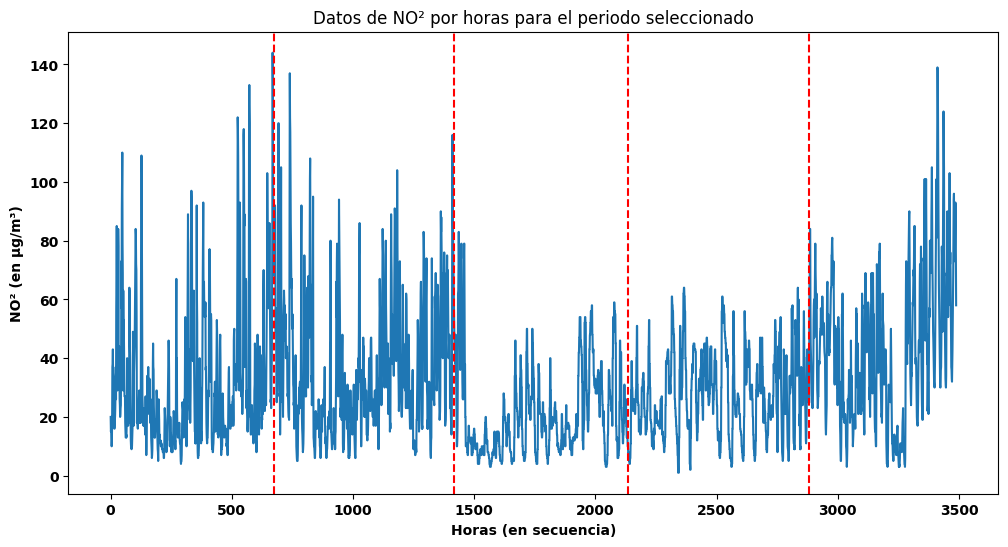

In [71]:
# Visualizamos datos de salida
range_data = range(len(data['NO2']))
plt.title('Datos de NO² por horas para el periodo seleccionado')
plt.xlabel('Horas (en secuencia)')
plt.ylabel('NO² (en µg/m³)')

days_month = [28, 31, 30, 31]
month_marks = list(map(lambda x: x * 24, accumulate(days_month, lambda x, y: (x+y))))
plt.plot(range_data, data['NO2'])
for mark in month_marks:
    plt.axvline(x=mark, color='r', linestyle='--')

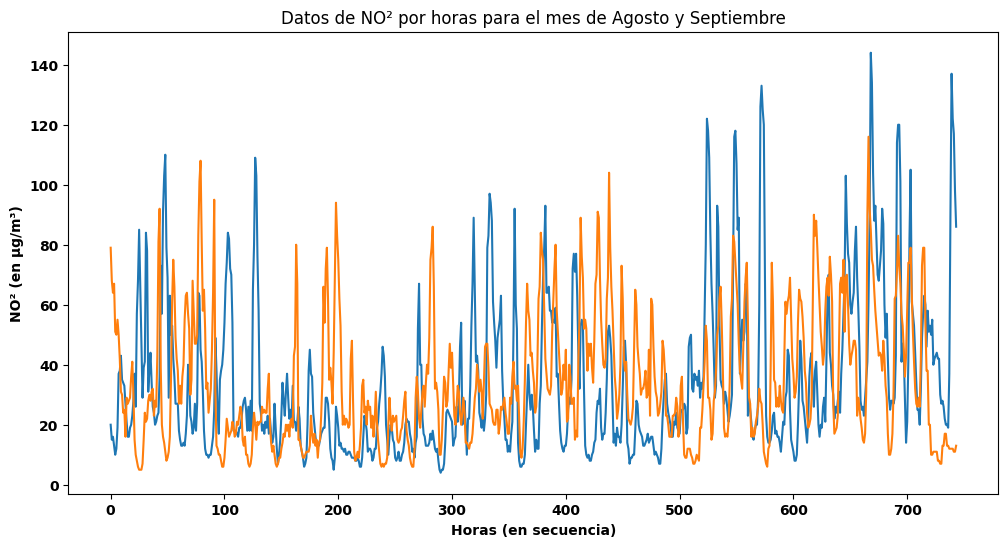

In [72]:
#  Dividimos los datos en 4 meses
data_ago = data.iloc[0:744]
data_sep = data.iloc[744:1488]
data_oct = data.iloc[1488:2232]
data_nov = data.iloc[2232:2976]
data_dic = data.iloc[2976:3720]

#  Visualizamos los datos de NO2 por horas para cada mes
plt.title('Datos de NO² por horas para el mes de Agosto y Septiembre')
plt.xlabel('Horas (en secuencia)')
plt.ylabel('NO² (en µg/m³)')
plt.plot(range(len(data_ago['NO2'])), data_ago['NO2'])


plt.xlabel('Horas (en secuencia)')
plt.ylabel('NO² (en µg/m³)')
plt.plot(range(len(data_sep['NO2'])), data_sep['NO2'])



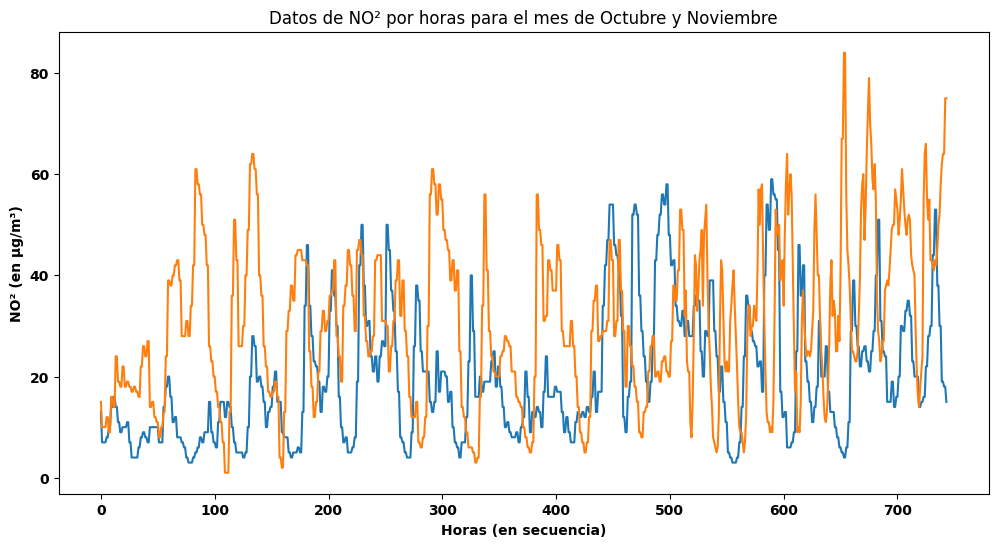

In [73]:
plt.title('Datos de NO² por horas para el mes de Octubre y Noviembre')
plt.xlabel('Horas (en secuencia)')
plt.ylabel('NO² (en µg/m³)')
plt.plot(range(len(data_oct['NO2'])), data_oct['NO2'])


plt.xlabel('Horas (en secuencia)')
plt.ylabel('NO² (en µg/m³)')
plt.plot(range(len(data_nov['NO2'])), data_nov['NO2'])


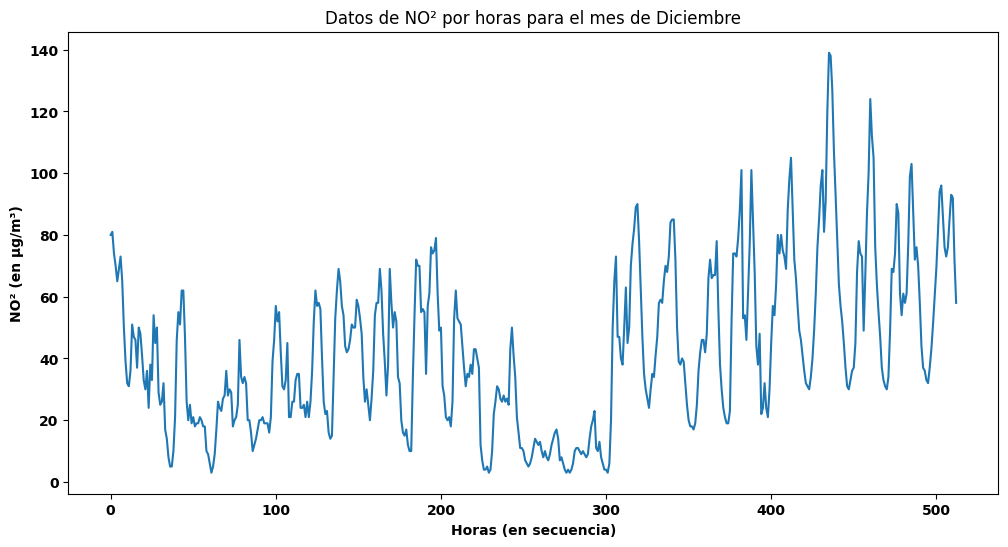

In [74]:

plt.title('Datos de NO² por horas para el mes de Diciembre')
plt.xlabel('Horas (en secuencia)')
plt.ylabel('NO² (en µg/m³)')
plt.plot(range(len(data_dic['NO2'])), data_dic['NO2'])


In [75]:
#  Comenzamos el analisis estadistico de los datos
data.describe()

,hora,NO2
count,3489.000000,3489.000000
mean,12.491258,31.719117
std,6.936144,21.988756
min,1.000000,1.000000
25%,6.000000,15.000000
50%,12.000000,26.000000
75%,19.000000,43.000000
max,24.000000,144.000000


In [76]:
#  Número de datos no válidos
len(datos[datos.isnull()])


0

In [77]:
#  Buscamos si hay algún caso con algún campo con valor 0 o negativo donde no debería
(datos <= 0).any()

False

<Axes: title={'center': 'Distribución de los valores de las medidas a usar'}>

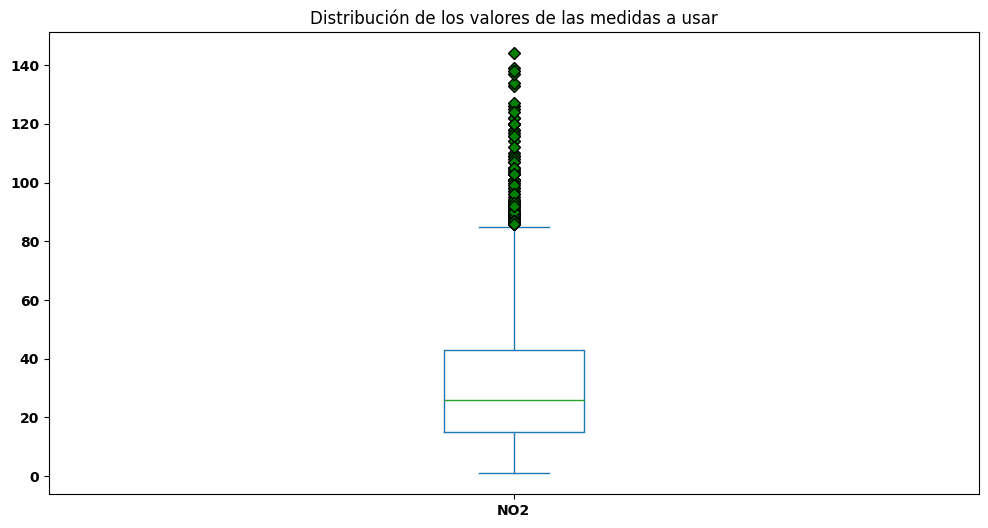

In [78]:
# boxplot de la distribucíón de las medidas
green_diamond = dict(markerfacecolor='g', marker='D')
datos.plot.box(title='Distribución de los valores de las medidas a usar', flierprops=green_diamond)

Predecir los niveles de NO2 en función de la hora y el día de la semana.

### Dividir el dataset en Training y Test

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [80]:
# modficar las variables hora y dia de la semana en formato númerioco
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['hora', 'dia_semana']])
y = data['NO2']

In [81]:
# dividir en trainning y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

2791
698


3489

### Cargar y elegir el modelo de regresión logística

In [82]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression(max_iter=1000, random_state=100)

### Entrenar el modelo de regresión logística con los datos de entrenamiento

In [83]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression(max_iter=1000, random_state=100)

log_r.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=100)

In [84]:
# Realizar predicciones en el conjunto de prueba
y_pred = log_r.predict(X_test)
print(y_pred)


[24.  5. 28. 15. 30. 12. 21. 28. 56. 16. 20. 16.  7. 16. 29.  6. 16.  5.
 24. 21. 21. 29. 10. 15.  7. 37. 26. 21. 19. 21.  7. 16. 29. 20. 15. 10.
 10. 28. 10. 28.  9. 26.  8. 21. 29.  7.  6.  5. 28. 19. 13. 19. 12. 58.
 14. 26. 19.  7.  7. 26. 12.  6. 10. 19.  5. 29. 28. 34.  5. 58. 26. 12.
 56. 21. 56.  7. 17. 12. 19. 21. 26. 29. 16. 26.  7. 42. 28. 14.  5. 19.
 10.  7.  5. 30. 17.  8.  5. 28. 14. 19. 29. 12.  8. 45. 12.  5. 19. 24.
 50. 16.  6. 19. 21. 38. 30. 14. 19. 15. 19. 14. 42.  6. 45.  5. 21. 12.
 10. 42. 23. 28. 16. 21. 17. 12. 12. 45. 30. 16. 14. 21. 17. 17. 42. 28.
 37. 22. 12.  7. 15. 29.  8. 10. 16. 30. 24. 28. 28. 42. 54. 29. 16. 23.
 10. 21. 17. 10. 20. 14. 13. 10. 21. 29.  3. 29. 20. 20. 45. 14. 12. 19.
 17. 15. 19. 28. 30. 29. 29. 26. 16. 28. 19. 26. 21. 28. 16. 21.  8. 12.
  5.  3. 54. 12.  7. 38.  5. 12. 24. 19. 28.  5. 28. 23. 22.  9.  5. 20.
 23. 14.  6. 10. 30. 13. 29.  5. 20. 30. 26. 21. 15. 45. 30. 28. 21. 22.
  5. 10. 29. 15.  5. 13.  7. 12. 22. 29. 20.  8. 34

### Evaluación del modelo a través de sus métricas

In [85]:
y_pred = log_r.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.054441260744985676


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         9
         5.0       0.11      0.29      0.16        14
         6.0       0.14      0.17      0.15        12
         7.0       0.12      0.29      0.17        14
         8.0       0.10      0.13      0.11        15
         9.0       0.08      0.05      0.06        19
        10.0       0.08      0.29      0.12        14
        11.0       0.00      0.00      0.00        13
        12.0       0.03      0.12      0.04         8
        13.0       0.12      0.13      0.13        15
        14.0       0.04      0.06      0.05        16
        15.0       0.00      0.00      0.00        14
        16.0       0.11      0.13      0.12        23
        17.0       0.08      0.12      0.10        16
        18.0       0.00      0.00      0.00        16
        19.0       0.00    

C:\Users\Claudia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Claudia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Claudia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.p

In [88]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

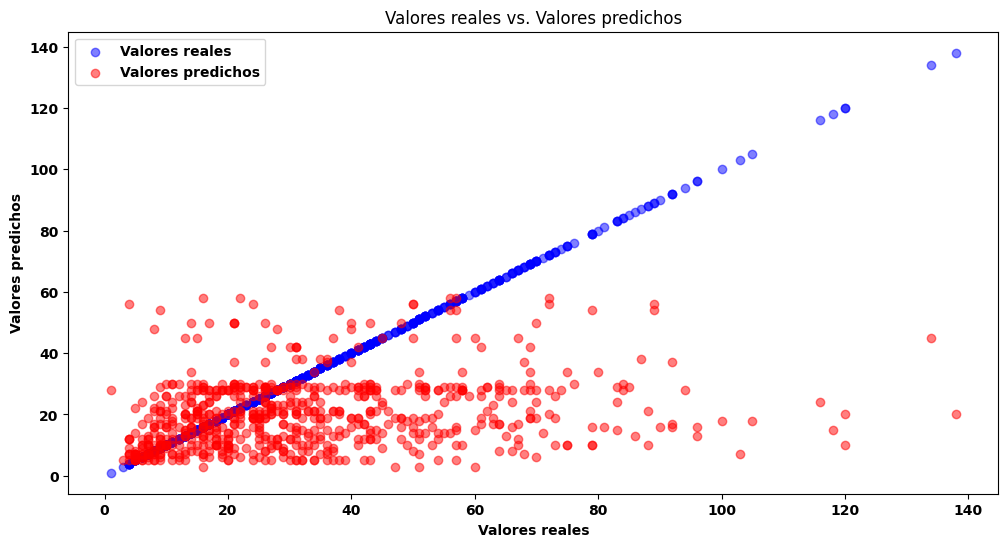

In [89]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test, label='Valores reales', color='blue', alpha=0.5)
plt.scatter(y_test, y_pred, label='Valores predichos', color='red', alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Valores predichos")
plt.legend()
plt.show()



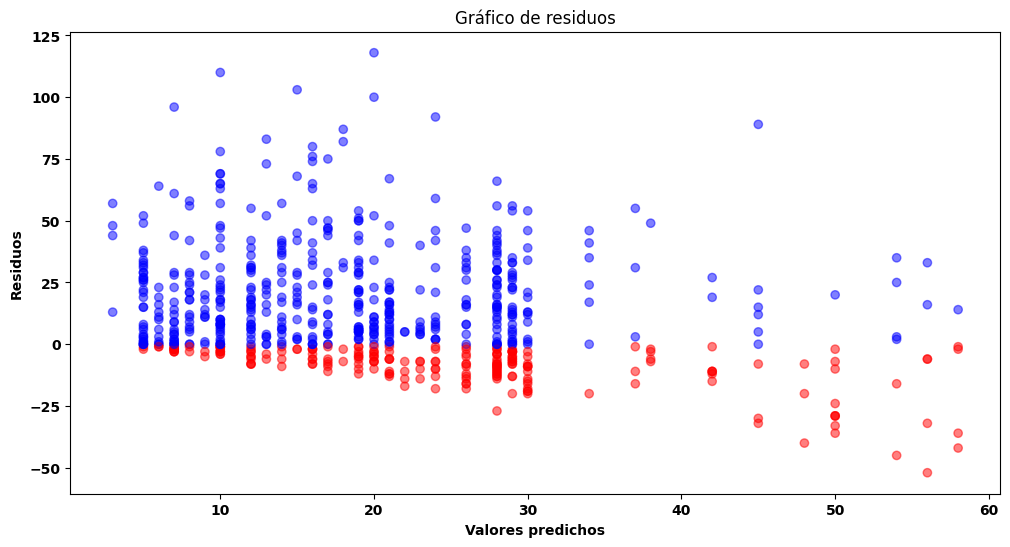

In [90]:
import matplotlib.pyplot as plt
import numpy as np

y_test_num = y_test.astype(float)
y_pred_num = np.array(y_pred).astype(float)

residuos = y_test_num - y_pred_num

colors = np.where(residuos >= 0, 'blue', 'red')

plt.scatter(y_pred_num, residuos, c=colors, alpha=0.5)
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.show()



### Gráfico pairplot

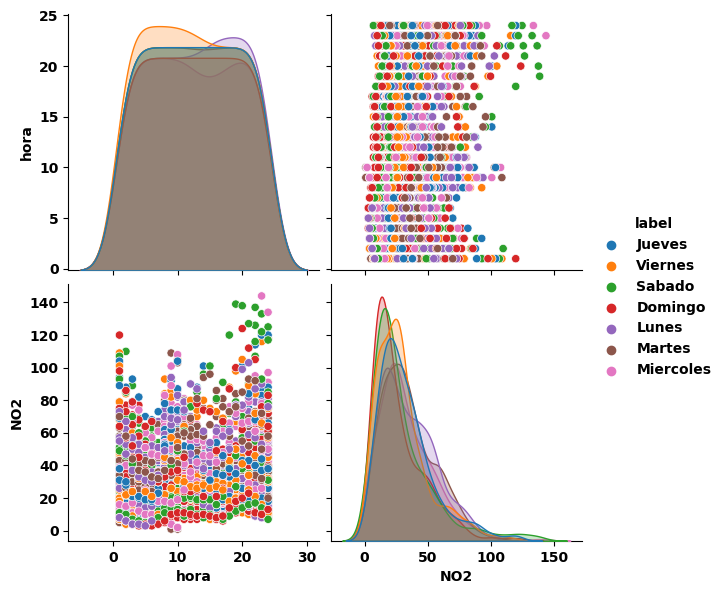

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_data = data[['hora', 'NO2', 'dia_semana']]
pairplot_data = pairplot_data.rename(columns={'dia_semana': 'label'})

sns.pairplot(pairplot_data, hue="label", height=3)
plt.show()

### Gráficos de caja para las variables 'hora' y 'NO2' 

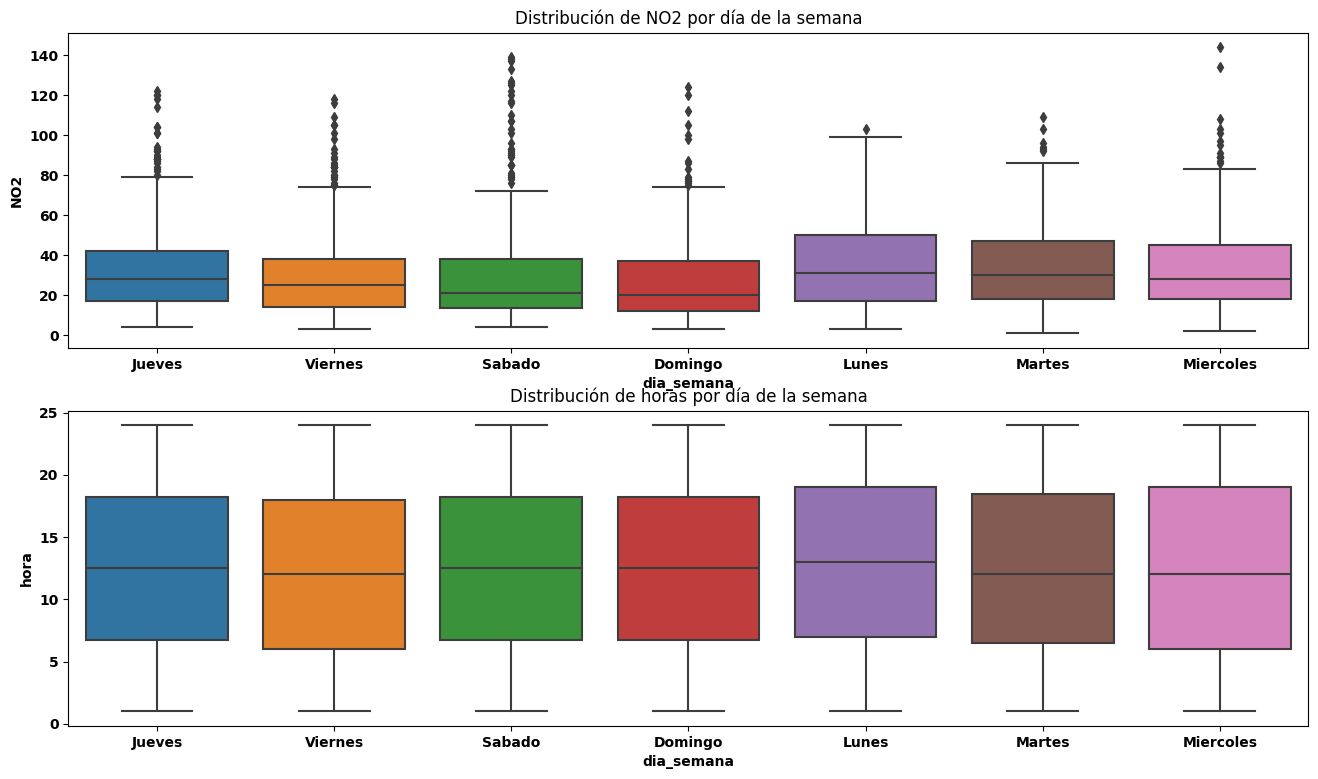

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(16, 9))
sns.boxplot(y="NO2", x="dia_semana", data=data, orient='v', ax=axes[0])
sns.boxplot(y="hora", x="dia_semana", data=data, orient='v', ax=axes[1])

axes[0].set_title('Distribución de NO2 por día de la semana')
axes[1].set_title('Distribución de horas por día de la semana')

plt.show()


In [93]:
y_categorical = pd.cut(y, bins=[0, 50, 100, 150, 200], labels=['Low', 'Medium', 'High', 'Very High'])
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=88)

log_r = LogisticRegression(max_iter=1000, random_state=100)
log_r.fit(X_train, y_train)

y_pred = log_r.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   8   0]
 [  0 555   0]
 [  0 135   0]]


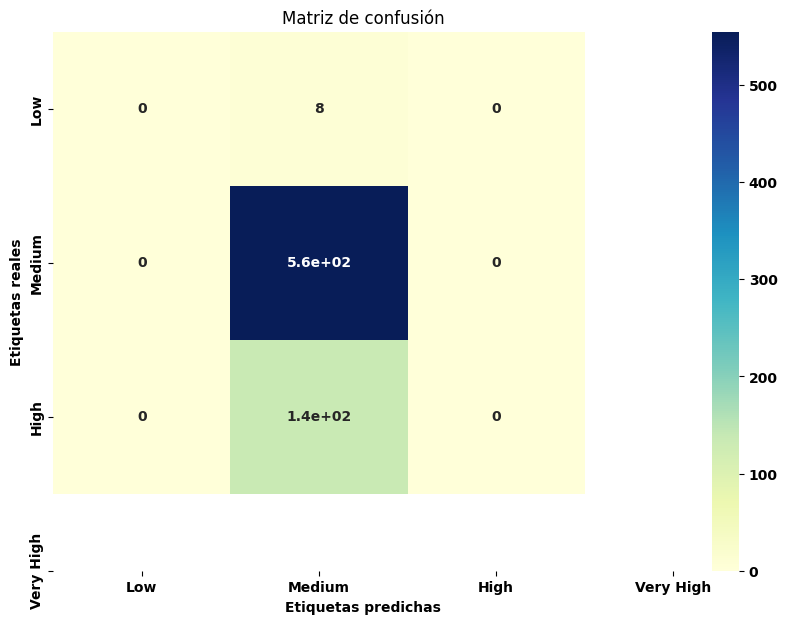

In [95]:
import seaborn as sns

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Etiquetas predichas")
plt.ylabel("Etiquetas reales")
plt.title("Matriz de confusión")
plt.show()